<a href="https://colab.research.google.com/github/raissa-coelho/treinamento-h2ia/blob/main/BuscaTabu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Busca Tabu
 Usando busca TABU para solucionar o problema da mochila definido como
  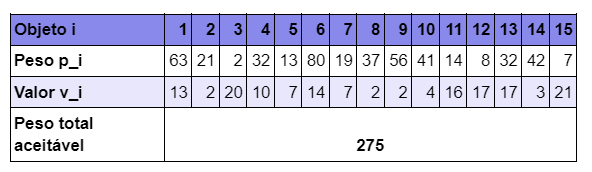

##Implementaçâo

In [27]:
import numpy as np
import random

class Tabu:
    peso_mochila = 275
    lista_tabu = []
    mochila_zero = []
    lista_vizinho = []
    avaliativa = 0

    def __init__(self, peso, valor):
        self.peso = peso
        self.valor = valor
        self.peso_total = 0
        self.mochila_atual = []
        self.guarda = []
        self.bitmodd = 0
        self.geraMochila()

    def geraMochila(self):
        for i in range(0 , 15):
            bit = random.randrange(2)
            Tabu.mochila_zero.append(bit)

    def pesoTotal(self, mochila):
        self.peso_total = 0
        for i in range(0, 15):
            if mochila[i] == 1:
                self.peso_total += self.peso[i]
        return self.peso_total
    
    def funcao_objetivo(self, mochila):
        soma = 0
        soma_avaliativa = 0
        for i in range(0, 15):
            if mochila[i] == 1:
                soma += self.peso[i] * mochila[i]
                soma_avaliativa += self.valor[i] * mochila[i]
        funcao_ob = soma_avaliativa * (1 - max(0, soma - Tabu.peso_mochila))
        Tabu.avaliativa = funcao_ob
        return funcao_ob

    def vizinhos(self, melhor_mochila):
        Tabu.lista_vizinho = []
        i = 0
        for i in range(0, 15):
            vizinho = []
            for j in range(0, 15):
                if j == i:
                    if melhor_mochila[j] == 0:
                        vizinho.append(1)
                    else:
                        vizinho.append(0)
                else:
                    vizinho.append(melhor_mochila[j])
            Tabu.lista_vizinho.append(vizinho)
            i += 1
    
    def ava_Vizinho(self):
        avaliacao = []
        for i in range(0, 15):
            avaliacao.append(self.funcao_objetivo(Tabu.lista_vizinho[i]))
        self.guarda = avaliacao
        return avaliacao

    def bit_mod(self, mochila, melhor_v):
         for i in range(0 , 15):
                if mochila[i] != melhor_v[i]:
                    bitmod = i
                    self.bitmodd = i
                    return bitmod
        
    def vizinhos_avaliacao_melhor(self, mochila):
        melhor = max(self.ava_Vizinho())
        todos = self.ava_Vizinho()
        posicao = 0
        bit = -1

        if(len(Tabu.lista_tabu) != 0):
            bit = Tabu.lista_tabu[0]
        for i in range(0, 15):
            if self.guarda[i] == melhor:
                posicao = i

        melhor_v = Tabu.lista_vizinho[posicao]

        if (bit != -1):
            
            bitmod = self.bit_mod(mochila, melhor_v)

            if bitmod == bit:
                melhor_posicao = 0
                for i in range(1 , 15):
                        if i != bitmod:
                            if todos[i] > todos[melhor_posicao]:
                                melhor_posicao = i
                return melhor_posicao
        return posicao

    def buscaTabu(self):
        iter = melhor_iter = 0
        iter_max = 10

        self.pesoTotal(Tabu.mochila_zero)
        self.funcao_objetivo(Tabu.mochila_zero)
        self.vizinhos(Tabu.mochila_zero)

        posicao = self.vizinhos_avaliacao_melhor(Tabu.mochila_zero)
        vizinho = Tabu.lista_vizinho[posicao]

        ava = Tabu.avaliativa
        me = self.guarda[posicao]
        
        self.mochila_atual = Tabu.mochila_zero
        
        if me > ava:
           Tabu.lista_tabu.append(posicao)
           self.mochila_atual = vizinho  
           melhor_iter+=1
        iter+=1

        while True:
            if (iter - melhor_iter) > iter_max:
                break
            self.pesoTotal(self.mochila_atual)
            self.funcao_objetivo(self.mochila_atual)
            self.vizinhos(self.mochila_atual)

            posicao = self.vizinhos_avaliacao_melhor(self.mochila_atual)
            vizinho = Tabu.lista_vizinho[posicao]

            ava = Tabu.avaliativa
            me = self.guarda[posicao]

            if me > ava:
                self.bitmodd = self.bit_mod(self.mochila_atual, vizinho)
                Tabu.lista_tabu[0] = self.bitmodd
                self.mochila_atual = vizinho
                melhor_iter+=1
            iter+=1

        print(Tabu.mochila_zero)
        print(self.mochila_atual)
        peso = self.pesoTotal(self.mochila_atual)
        print(peso)

def main():
    peso = np.array([63,21,2,32,13,80,19,37,56,41,14,8,32,42,7])
    valor = np.array([13,2,20,10,7,14,7,2,2,4,16,17,17,3,21])
    a = Tabu(peso, valor)
    a.buscaTabu()

if __name__ == "__main__":
    main()

[1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0]
[1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0]
252
